<a href="https://colab.research.google.com/github/Alexandre77777/image_processing/blob/main/11.%20%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BB%D0%B8%D1%86%20%D0%B2%20OpenCV/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%E2%84%967_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D1%86_%D0%B2_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Теория №7. Распознавание лиц в OpenCV**

OpenCV имеет несколько встроенных алгоритмов для распознавания лиц.

С их помощью данный процесс сводится к нескольким шагам:

1. **Сбор данных:** Сбор изображений c лицами.
2. **Обучение:** Передача изображений на вход соответствующему алгоритму для извлечения из них характерных признаков.
3. **Распознавание:** Проверка алгоритма на новых изображениях.

## **1. Алгоритм EigenFaces Face Recognizer**

Алгоритм алгоритм исходит из того, что **не все части лица одинаково важны** с точки зрения распознавания. Когда вы смотрите на человека, вы инстинктивно выделяете **характерные черты** – глаза, нос, щеки, лоб – и замечаете, как они **изменяются относительно друг друга**. Фактически вы фокусируетесь именно на **областях максимального изменения**, что в математическом смысле соответствует понятию **«дисперсия»**. К примеру, участок от глаз к носу сильно отличается от участка от носа к рту. Если вы сопоставляете несколько лиц, то интуитивно сравниваете именно эти зоны, поскольку они несут **наиболее важную информацию** и помогают **отличить одного человека от другого**.

Такой подход лежит в основе работы **распознавателя лиц EigenFaces**. Он берет все **обучающие изображения**, старается **выделить** из них **наиболее ценные компоненты** (те, что отвечают за наибольшую дисперсию/изменение) и **отбрасывает** всё менее значимое. Таким образом, алгоритм не только выделяет **важные компоненты** из обучающих данных, но и **экономит память**, отсекая второстепенное. Эти существенные участки называются **«главными компонентами»**.

Ниже приводятся изображения, на которых можно рассмотреть **главные компоненты** лиц. Формируя их в виде своеобразных «обобщённых лиц», мы и получаем **«eigen faces»**, откуда и пошло название алгоритма. Во время обучения **EigenFaces** не только **извлекает главные компоненты**, но и «запоминает», **какой** компонент **принадлежит** каждому конкретному человеку.



**Главные компоненты**

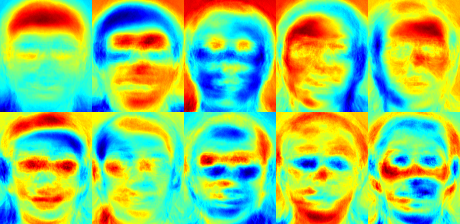



 **Алгоритм EigenFaces** учитывает и **особенности освещённости**, поскольку свет и тень могут напрямую влиять на то, как выглядят черты лица.

Когда вы подаёте алгоритму **новое изображение**, он повторяет тот же самый процесс: **выделяет** из снимка **главную компоненту** и **сопоставляет** её с теми, что были сохранены при обучении. Находит **наиболее подходящий** вариант и возвращает **метку** (то есть имя или идентификатор) **того лица**, к которому эта компонента оказалась ближе всего.

### **Реализация алгоритма в OpenCV**

Функция `cv2.face.createEigenFaceRecognizer()` в библиотеке OpenCV используется для создания распознавателя лиц на основе метода собственных лиц (Eigenfaces). Давайте рассмотрим каждый параметр этой функции:

```python
cv2.face.createEigenFaceRecognizer(num_components=0, threshold=DBL_MAX)
```

1. `num_components`: Этот параметр определяет количество собственных векторов (Eigenvectors), которые будут использоваться для представления лиц. Значение по умолчанию равно 0, что означает, что будут использоваться все доступные собственные векторы. Уменьшение этого значения может ускорить процесс распознавания, но может также снизить точность.

2. `threshold`: Этот параметр устанавливает пороговое значение для определения, является ли лицо известным или нет. Если расстояние между тестовым лицом и ближайшим известным лицом меньше этого порога, лицо считается распознанным. Значение по умолчанию равно `DBL_MAX`, что означает, что любое лицо будет считаться распознанным. Уменьшение этого значения может сделать распознавание более строгим.

## **2. Алгоритм FisherFaces Face Recognizer**

Этот алгоритм представляет собой улучшенную версию распознавателя лиц, который изначально использовал метод EigenFaces. Напомню, что распознаватель лиц EigenFaces рассматривает все тренировочные изображения сразу и пытается выделить «главные компоненты» из **всех** лиц **одновременно**, то есть извлекает общие признаки, характерные для совокупности всех лиц в обучающей выборке. При таком подходе мы фокусируемся не на тех чертах, которые помогают отличить одно лицо от другого, а, напротив, на тех, что являются типичными для различных лиц в целом.

Однако у такого метода есть существенный недостаток, связанный с учётом освещённости. Возьмём для примера ситуацию, когда фотографии одного и того же человека сделаны при сильно различающихся условиях освещения (очень тёмные или, наоборот, слишком светлые снимки). В результате распознаватель лиц EigenFaces может «решить», что именно эти перепады освещённости представляют собой наиболее важные признаки, и «отбросит» некоторые отличительные особенности лиц других людей. Тогда главные компоненты будут в основном описывать черты только одного человека, а не всех участников обучающей выборки.

Чтобы исправить эту проблему, можно настроить алгоритм EigenFaces так, чтобы он извлекал «полезные черты»** для каждого человека отдельно, а не обрабатывал все лица разом. Тем не менее, на практике этим вопросом занялся более продвинутый алгоритм распознавания лиц — **Fisherfaces**. Его разработали специально, чтобы выделять именно **дифференцирующие признаки**: он ищет черты, благодаря которым один человек отличается от другого. За счёт этого мешается доминированию «посторонних» факторов (например, слишком сильно меняющейся освещённости одного лица) над реальными отличиями между разными людьми.


Классическим примером демонстрации работы Fisherfaces служит изображение «лиц Фишера» — набора характерных признаков в виде обобщённых лиц, аналогично тому, как «лицами Эйгена» в EigenFaces называли обобщённые признаки лиц. Отсюда, собственно, алгоритм и получил своё название.

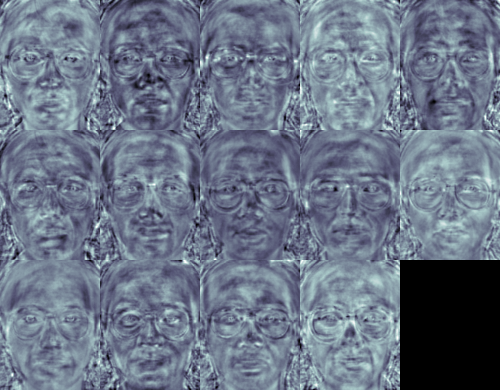

Заметим, что распознаватель Fisherfaces не устраняет полностью влияние освещённости. Он лишь предотвращает ситуацию, когда признаки одного человека (в том числе обусловленные светом) «затмевают» признаки других людей. При этом изменения освещённости всё равно могут быть ошибочно восприняты как ценные особенности изображения, хотя на деле они не являются истинными чертами лица.

### **Реализация алгоритма в OpenCV**

Функция `cv2.face.createFisherFaceRecognizer()` в библиотеке OpenCV используется для создания распознавателя лиц на основе метода линейного дискриминантного анализа Фишера (Fisherfaces). Давайте рассмотрим каждый параметр этой функции:

```python
cv2.face.createFisherFaceRecognizer(num_components=0, threshold=DBL_MAX)
```

1. `num_components`: Этот параметр определяет количество компонентов (Fisherfaces), которые будут использоваться для представления лиц. Значение по умолчанию равно 0, что означает, что будут использоваться все доступные компоненты. Уменьшение этого значения может ускорить процесс распознавания, но может также снизить точность.

2. `threshold`: Этот параметр устанавливает пороговое значение для определения, является ли лицо известным или нет. Если расстояние между тестовым лицом и ближайшим известным лицом меньше этого порога, лицо считается распознанным. Значение по умолчанию равно `DBL_MAX`, что означает, что любое лицо будет считаться распознанным. Уменьшение этого значения может сделать распознавание более строгим.

## **3. Алгоритм Local Binary Patterns Histograms (LBPH) Face Recognizer**



Мы знаем, что на методы Eigenfaces и Fisherfaces заметно влияет освещённость, а в реальных условиях невозможно всегда поддерживать идеальный свет, поскольку он зависит от множества факторов Чтобы преодолеть эту ограниченность, существует более совершенный распознаватель лиц — LBPH (Local Binary Patterns Histogram). Он делает упор не на «глобальные», а на «локальные» особенности изображения, что помогает компенсировать разницу в освещении и сосредоточиться на структуре самого лица.

В основе LBPH лежит идея разбивки изображения на небольшие области (локальные фрагменты). Рассмотрим окно 3×3, которое последовательно «скользит» по всему изображению. В каждом положении окна:

1. Вы выбираете центральный пиксель и сравниваете его интенсивность с интенсивностью соседей.  
2. Для всех соседних пикселей, чья яркость меньше или равна яркости центрального, ставится «1», а для остальных «0».  
3. Полученная последовательность из нулей и единиц (например, 11100011) интерпретируется как двоичное число и описывает локальную структуру соответствующего фрагмента лица.  

Затем такие двоичные шаблоны извлекаются из каждого положения окна 3×3 на изображении, объединяются в общий набор и формируют так называемые «локальные дескрипторы». Поскольку алгоритм анализирует небольшие области, резкие перепады освещённости в разных частях снимка меньше влияют на итоговое распознавание, чем в случаях с Eigenfaces и Fisherfaces. Благодаря этому LBPH говорит о том, какие участки и паттерны действительно характерны для лица, а не просто отражают ситуацию со светом.

**Маркировка LBP**

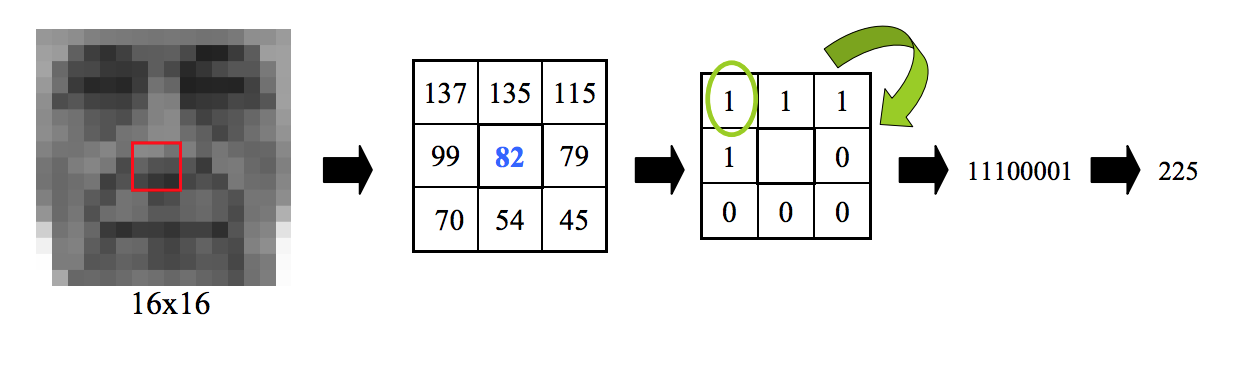




Теперь можно понять, почему в названии алгоритма упоминаются именно «Local Binary Patterns». Локальные двоичные паттерны (patterns) представляют собой последовательность единиц и нулей, которая отражает структуру небольшого участка изображения (локального фрагмента). Но что насчёт гистограммы, упомянутой в аббревиатуре LBPH?

После того как получен набор локальных двоичных паттернов (каждый из них получен путём сравнения центрального пикселя с его соседями в рамках окна 3×3), следующий этап — перевести каждый паттерн из двоичной формы в десятичную. Этот процесс часто называют «binary to decimal conversion». В итоге каждый двоичный паттерн, например «11100011», становится числом в десятеричной системе счисления.

На заключительном шаге все эти десятичные значения сводятся в одну совокупность и распределяются по «бинам» в гистограмме (histogram). Каждый «бин» гистограммы отвечает отдельному числу или диапазону чисел, что даёт наглядную картину о том, как часто встречаются определённые локальные паттерны в анализируемом изображении. Именно поэтому данная техника и называется Local Binary Patterns Histogram — «гистограмма локальных двоичных шаблонов», где и «Local Binary Patterns», и «Histogram» вносят свой вклад в точность распознавания.

**Выборочная гистограмма**

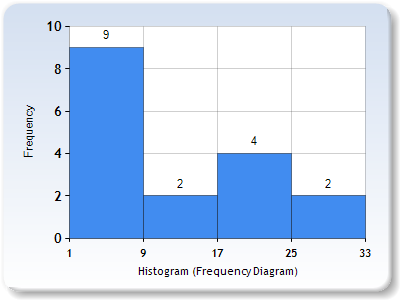



Теперь нам очевидно, в чём заключается роль гистограммы в алгоритме LBPH. После завершения обучения формируется ровно по одной гистограмме на каждое изображение лица из обучающего набора. Если, к примеру, в наборе было 100 снимков, то результатом обучения LBPH станет 100 гистограмм, где каждая «привязана» к определённому лицу. При этом алгоритм регистрирует, какой именно гистограмме соответствует тот или иной человек.

Когда наступает этап распознавания, распознаватель строит гистограмму для нового изображения и сравнивает её со всеми сохранёнными, чтобы найти наиболее схожую. Обнаружив лучшее совпадение, LBPH возвращает метку (идентификатор) лица, связанного с этой гистограммой.

Заметьте, что локальные бинарные паттерны (LBP) практически не меняются под влиянием освещённости, поэтому даже при разных условиях светотени лицо в целом сохраняет свою «цифровую подпись». Для наглядности ниже приведён перечень людей и их соответствующих изображений, где видно, что на итоговые LBP-изображения не влияют перепады освещённости.

Такой тип визуализации помогает понять, насколько часто встречаются те или иные «значения» (в нашем случае — характеристики лица) и позволяет быстро сравнить новые данные с уже известными паттернами. Именно благодаря этой возможности LBPH столь эффективен при распознавании лиц даже в условиях переменного освещения.


**Лица LBP**

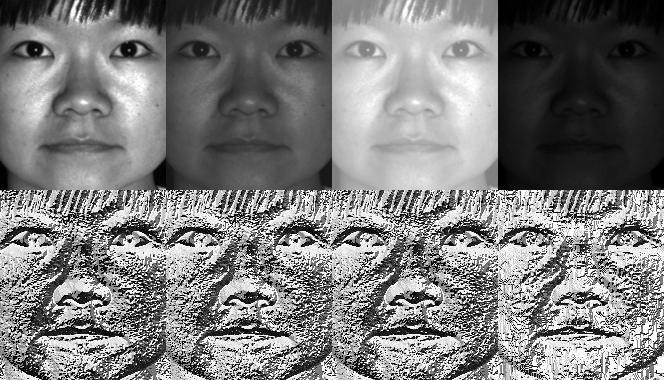

**[источник](http://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html)**.

Теоретическая часть закончена, и теперь наступает время кодирования! Готовы погрузиться в кодирование? Тогда давайте приступим.

### **Реализация алгоритма в OpenCV**

Функция `cv2.face.createLBPHFaceRecognizer()` в библиотеке OpenCV используется для создания распознавателя лиц на основе метода локальных бинарных шаблонов и гистограмм (LBPH). Давайте рассмотрим каждый параметр этой функции:

```python
cv2.face.createLBPHFaceRecognizer(radius=1, neighbors=8, grid_x=8, grid_y=8, threshold=DBL_MAX)
```

1. `radius`: Этот параметр определяет радиус окружности, используемой для построения локальных бинарных шаблонов. Значение по умолчанию равно 1. Увеличение радиуса может улучшить устойчивость к изменениям освещения, но может также увеличить время обработки.

2. `neighbors`: Этот параметр задает количество точек на окружности, используемых для построения локальных бинарных шаблонов. Значение по умолчанию равно 8. Увеличение количества соседей может улучшить точность распознавания, но также увеличит вычислительную сложность.

3. `grid_x`: Этот параметр определяет количество ячеек по горизонтали для построения гистограмм. Значение по умолчанию равно 8. Увеличение этого значения может улучшить точность, но увеличит размерность признакового пространства.

4. `grid_y`: Этот параметр определяет количество ячеек по вертикали для построения гистограмм. Значение по умолчанию равно 8. Аналогично `grid_x`, увеличение этого значения может улучшить точность, но увеличит размерность признакового пространства.

5. `threshold`: Этот параметр устанавливает пороговое значение для определения, является ли лицо известным или нет. Если расстояние между тестовым лицом и ближайшим известным лицом меньше этого порога, лицо считается распознанным. Значение по умолчанию равно `DBL_MAX`, что означает, что любое лицо будет считаться распознанным. Уменьшение этого значения может сделать распознавание более строгим.

# **Пайплан для решения задачи распознавания лиц**

### **1. Установка зависимостей**

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### **2. Загрузка классификатора лиц**


Каскад Хаара — это простой, но эффективный алгоритм, который обучается отличать лицо от не-лица при помощи так называемых «признаков Хаара» Эти признаки (или «Хаар-признаки») выглядят как маленькие прямоугольные шаблоны, реагирующие на изменения яркости в отдельных участках изображения. Во время обучения алгоритм просматривает множество примеров лиц и не-лиц, «запоминая» набор простых шаблонов, наиболее характерных для области лица.

Сам каскад устроен по принципу «от простого к сложному»: на первом этапе он быстро отсекает те участки картинки, которые точно не похожи на лицо, а затем более тонко проверяет оставшиеся области. Благодаря тому, что ранние этапы работают быстро и «не тратят время» на всю картинку, Каскад Хаара позволяет с высокой скоростью находить лица даже на видеопотоке. Однако он может ошибаться, если у человека нетипичный поворот головы или сильные помехи на изображении

Несмотря на появление более продвинутых методов, вроде нейронных сетей, Каскад Хаара по-прежнему широко известен (например, в библиотеке OpenCV) и используется для базовых задач обнаружения лиц, а также в случаях, где важна простота и быстрота распознавания

In [ ]:
# Загрузка каскада Хаара для обнаружения лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

### **3. Инициализация функций для формирования обучающего набора данных**

In [ ]:
# Функция для загрузки изображений, обнаружения лиц и создания меток
def load_faces_and_labels(data_path, target_size=(255, 255)):
    faces = []
    labels = []
    label_dict = {}

    # Проходим по всем папкам в указанном пути
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            label_id = len(label_dict)
            label_dict[label_id] = label

            # Проходим по всем изображениям в папке
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # Обнаружение лиц на изображении
                    detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
                    for (x, y, w, h) in detected_faces:
                        # Обрезка лица
                        face = gray[y:y+h, x:x+w]
                        # Масштабирование лица до целевого размера
                        face_resized = cv2.resize(face, target_size)
                        faces.append(face_resized)
                        labels.append(label_id)

    return faces, labels, label_dict

### **4. Загрузка данных, формирование обучающей выборки**

In [ ]:
# Загрузка данных
data_path = '/content/Лица'
faces, labels, label_dict = load_faces_and_labels(data_path)

### **5. Обучение алгоритма на сформированной выборке**

In [ ]:
# Создание и обучение распознавателя
recognizer = cv2.face.EigenFaceRecognizer_create(num_components=0, threshold=float('inf'))
recognizer.train(faces, np.array(labels))

### **6. Инициализация функции для обработки целевых изображений**

In [11]:
# Функция для распознавания лица на изображении
def recognize_face(image_path, recognizer, label_dict, target_size=(255, 255)):
    image = cv2.imread(image_path)
    if image is None:
        return "Ошибка: не удалось загрузить изображение", None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Обнаружение лиц на изображении
    detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    results = []
    for (x, y, w, h) in detected_faces:
        face = gray[y:y+h, x:x+w]
        # Масштабирование лица до целевого размера
        face_resized = cv2.resize(face, target_size)
        label, confidence = recognizer.predict(face_resized)
        if confidence < 5000:  # Пороговое значение можно настроить
            result = f"Распознано лицо: {label_dict[label]} (Уверенность: {confidence})"
        else:
            result = "Лицо не распознано"
        results.append((x, y, w, h, result))

    return results, image

### **7. Проверка обученного алгоритма и вывод результата**

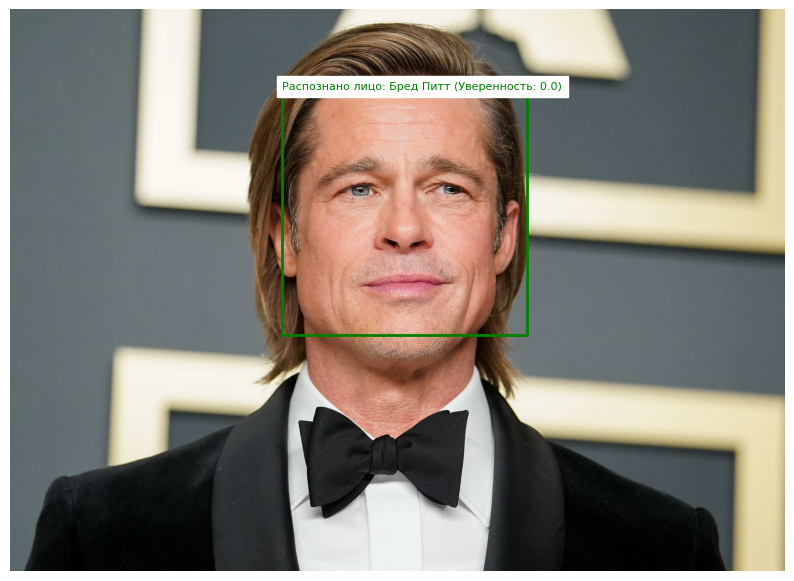

In [12]:
# Пример использования
test_image_path = '/content/Лица/Бред Питт/brad-pitt.jpg'  # Укажите путь к тестовому изображению
results, image = recognize_face(test_image_path, recognizer, label_dict)

# Отображение результатов с помощью Matplotlib
if image is not None:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for (x, y, w, h, result) in results:
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='g', linewidth=2))
        plt.text(x, y-10, result, color='g', fontsize=8, backgroundcolor='w')
    plt.axis('off')
    plt.show()
else:
    print("Не удалось загрузить тестовое изображение.")